In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
print(os.getcwd())

D:\docs_mariana\ProjetosGit\averiguacao_cadastral\Analises_Mariana\Analises_modelo


In [3]:
# Load the datasets
import pandas as pd

# Usando o caminho absoluto
df_balanceado = pd.read_csv('D:/docs_mariana/ProjetosGit/averiguacao_cadastral/Data_modelo/df_modelo_balanceado.csv')

In [4]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,...,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,0.0,3,3290.0,...,0.333333,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,0.0,8,1774.0,...,0.000000,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,205.0,2,1966.0,...,0.000000,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,0.0,2,812.0,...,0.000000,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,0.0,3,5772.0,...,0.000000,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [5]:
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96792 entries, 0 to 96791
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uf_ibge                          96792 non-null  int64  
 1   classf                           96792 non-null  int64  
 2   id_familia                       96792 non-null  int64  
 3   cod_local_domic_fam              96792 non-null  float64
 4   qtd_comodos_domic_fam            96792 non-null  float64
 5   cod_material_piso_fam            96792 non-null  float64
 6   cod_iluminacao_domic_fam         96792 non-null  float64
 7   ind_parc_mds_fam                 96792 non-null  float64
 8   qtde_pessoas                     96792 non-null  int64  
 9   dias_cadastramento               96791 non-null  float64
 10  dias_atualizacao                 96792 non-null  int64  
 11  classe_renda                     96792 non-null  int64  
 12  rf_idade          

In [6]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pc

In [7]:
#Checando os valores únicos das colunas
# Definindo as colunas a serem analisadas
columns_to_check = ['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'classe_renda', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio'
]

# Criando um dicionário para armazenar os tipos de resposta
response_types = {}

# Iterando sobre as colunas e coletando os valores únicos
for column in columns_to_check:
    response_types[column] = df_balanceado[column].unique()

# Exibindo os tipos de resposta de cada coluna
for column, unique_values in response_types.items():
    print(f"Coluna: {column}\nValores únicos: {unique_values}\n")

Coluna: uf_ibge
Valores únicos: [15 13 29 28 33 41 35 26 25 21 22 23 43 32 31 27 52 24 16 50 17 14 53 11
 42 12 51]

Coluna: classf
Valores únicos: [1 3 2]

Coluna: cod_local_domic_fam
Valores únicos: [1. 2. 9.]

Coluna: qtd_comodos_domic_fam
Valores únicos: [ 2.  4.  5. -1.  3.  1.  6.  7.  8.  9. 11. 20.  0. 10. 13. 12. 14. 16.
 15. 18.]

Coluna: cod_material_piso_fam
Valores únicos: [ 2.  5. -1.  4.  1.  3.  7.  6.]

Coluna: cod_iluminacao_domic_fam
Valores únicos: [ 1. -1.  2.  3.  6.  5.  4.]

Coluna: ind_parc_mds_fam
Valores únicos: [  0. 205. 201. 204. 202.   9. 301. 306. 303. 305. 304. 302. 101. 203.]

Coluna: qtde_pessoas
Valores únicos: [ 3  8  2  1  5  6  4  7 11 10  9 12 13]

Coluna: dias_cadastramento
Valores únicos: [3290. 1774. 1966. ...  765. 5094.  163.]

Coluna: dias_atualizacao
Valores únicos: [ 510  101  598 ...  190  218 1269]

Coluna: classe_renda
Valores únicos: [0 1 2]

Coluna: rf_idade
Valores únicos: [ 44  38  31  55  51  27  46  22  30  21  23  19  63  20  29

## Identificando as features com grande correlação

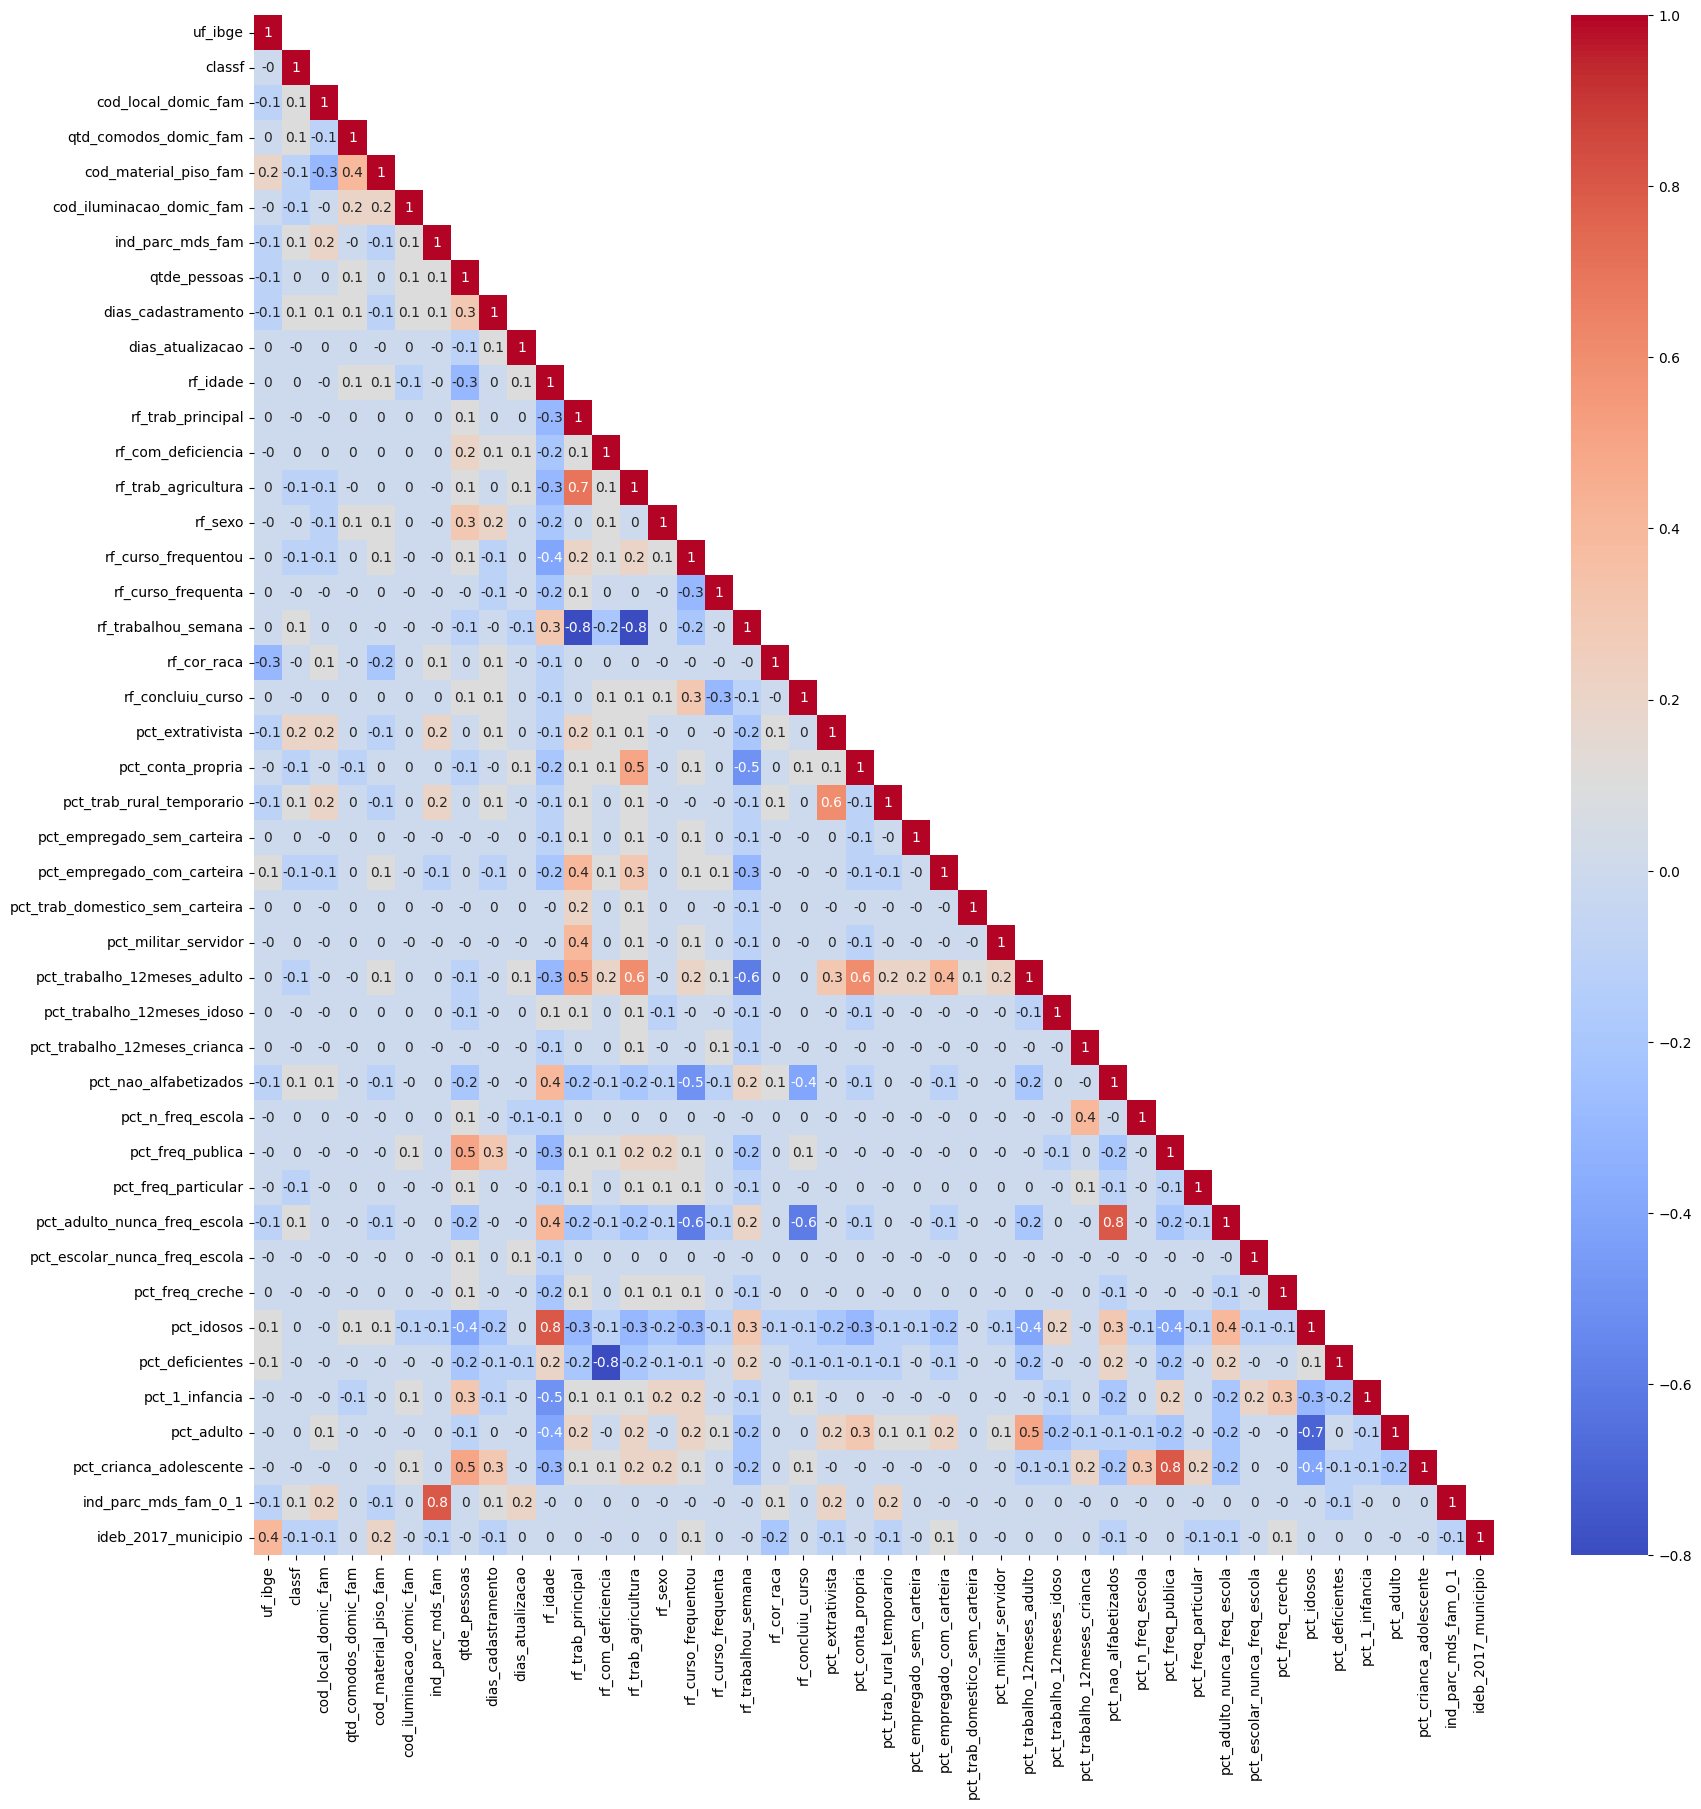

In [8]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'dias_cadastramento', 'dias_atualizacao', 'rf_idade',
       'rf_trab_principal', 'rf_com_deficiencia', 'rf_trab_agricultura',
       'rf_sexo', 'rf_curso_frequentou', 'rf_curso_frequenta',
       'rf_trabalhou_semana', 'rf_cor_raca', 'rf_concluiu_curso',
       'pct_extrativista', 'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [9]:
import numpy as np
import pandas as pd

# Selecionar apenas as colunas numéricas
numeric_cols = df_features.select_dtypes(include=np.number).columns

# Calcular a matriz de correlação
corr_matrix = df_features[numeric_cols].corr()

# Encontrar as correlações com valor absoluto maior que 0.8
corr_strong = corr_matrix[abs(corr_matrix) > 0.8]

# Imprimir as correlações fortes
for col in corr_strong.columns:
    for row in corr_strong.index:
        # Evita a auto-correlacão (corr = 1)
        if col != row and corr_strong.loc[row, col] > 0.8:
            print(f"Correlação forte entre {row} e {col}: {corr_strong.loc[row, col]}")


Correlação forte entre ind_parc_mds_fam_0_1 e ind_parc_mds_fam: 0.8030947423626631
Correlação forte entre pct_adulto_nunca_freq_escola e pct_nao_alfabetizados: 0.81289494494895
Correlação forte entre pct_nao_alfabetizados e pct_adulto_nunca_freq_escola: 0.81289494494895
Correlação forte entre ind_parc_mds_fam e ind_parc_mds_fam_0_1: 0.8030947423626631


In [10]:
#Retirando features com correlação > 8
df_balanceado = df_balanceado.drop(columns=['pct_adulto_nunca_freq_escola', 'ind_parc_mds_fam'])
                                               
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,3,3290.0,510,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,8,1774.0,101,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2,1966.0,598,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2,812.0,285,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,3,5772.0,591,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [11]:
df_balanceado.columns

Index(['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
    

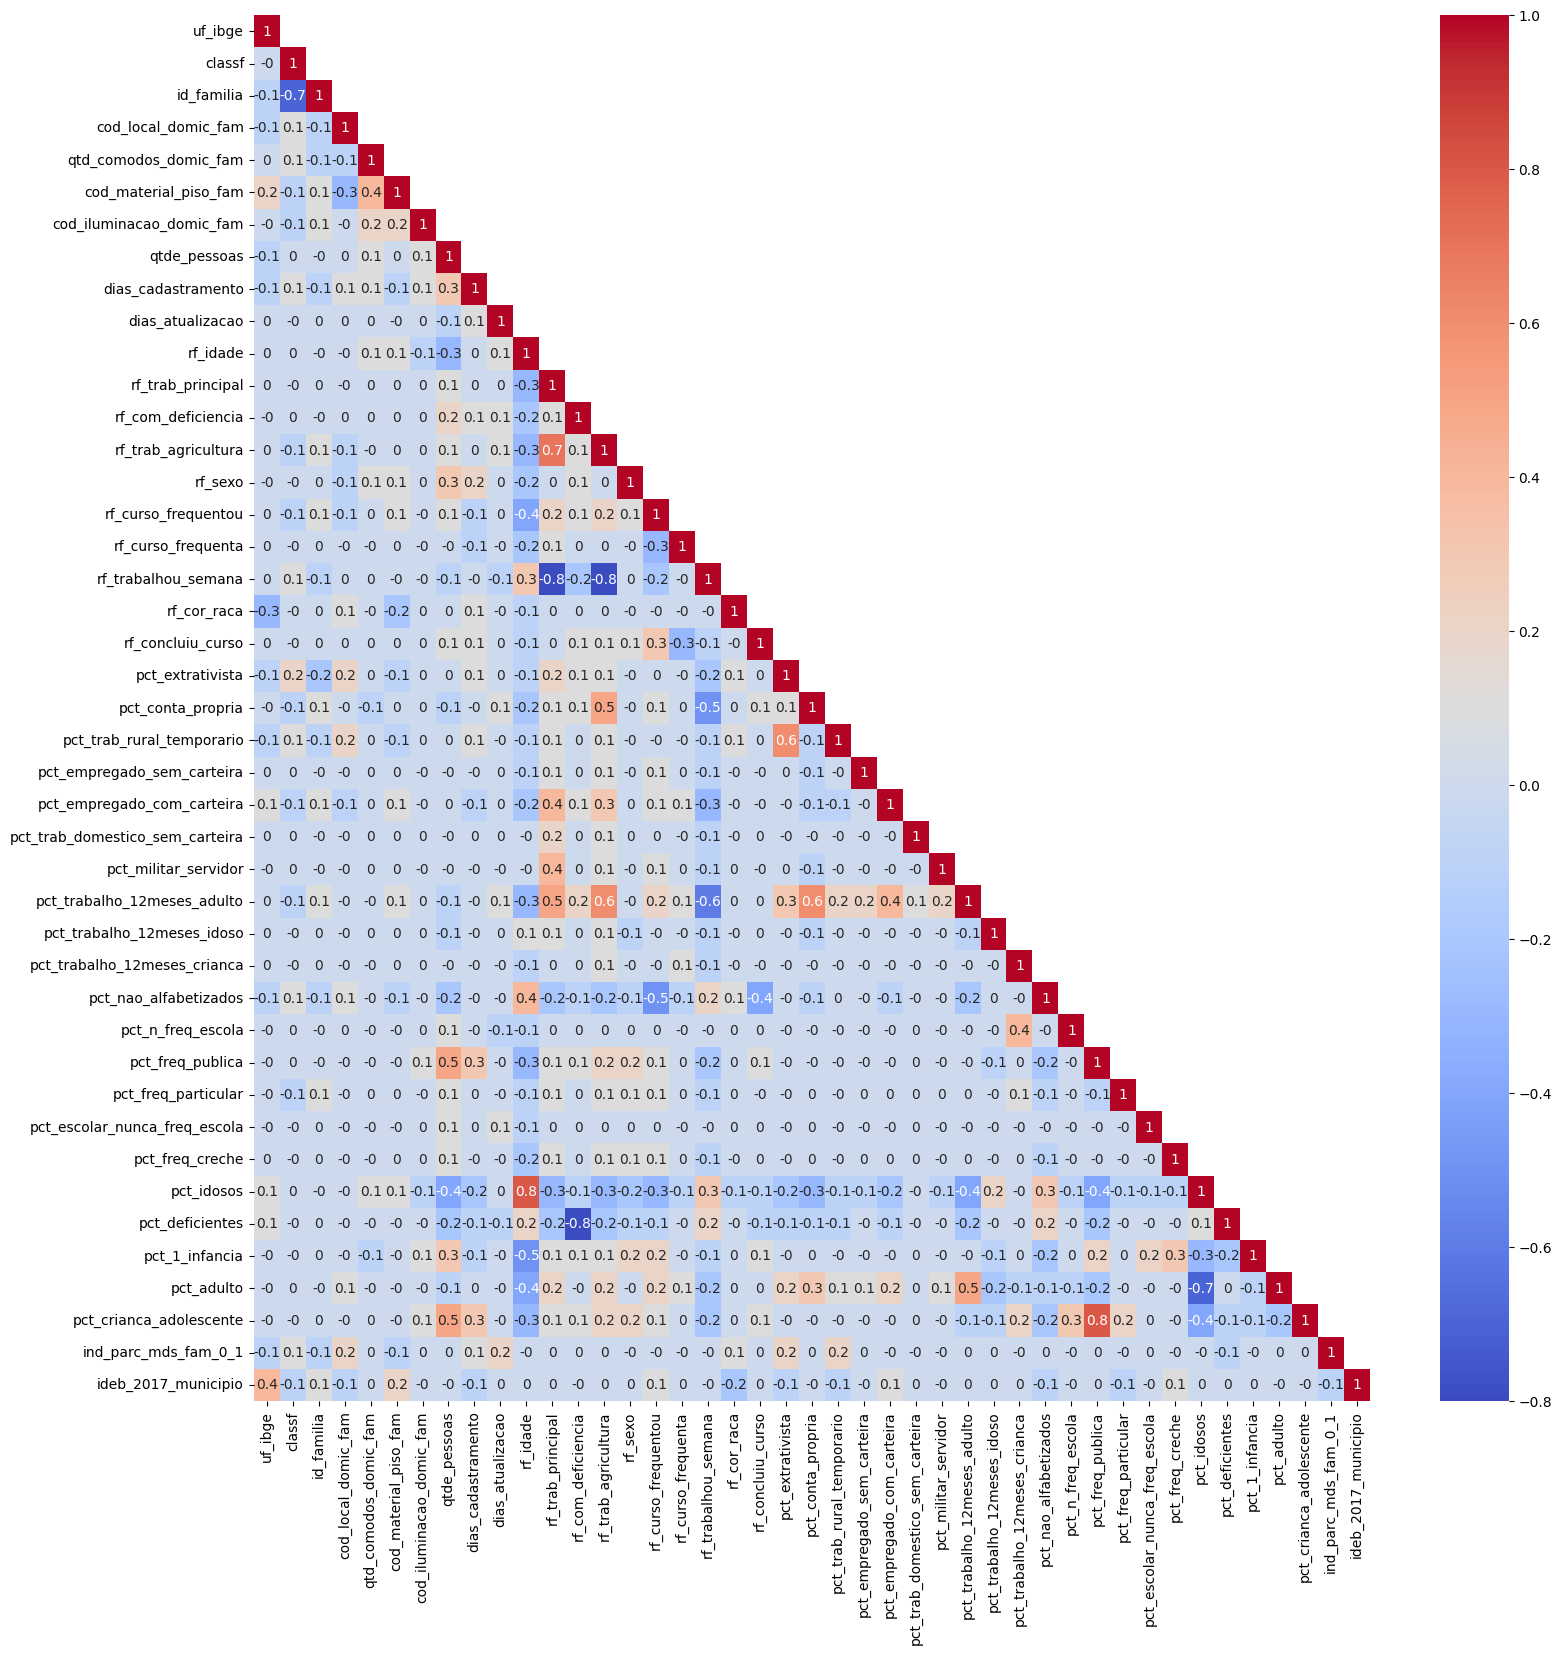

In [12]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['uf_ibge', 'classf', 'id_familia', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'cod_material_piso_fam',
       'cod_iluminacao_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes', 'pct_1_infancia', 'pct_adulto',
       'pct_crianca_adolescente', 'ind_parc_mds_fam_0_1',
       'ideb_2017_municipio']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(18,18))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [13]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.7
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: classf e id_familia, Correlação: 0.73
Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: rf_trab_principal e rf_trab_agricultura, Correlação: 0.73
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.79
Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.81
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.80
Colunas: pct_idosos e pct_adulto, Correlação: 0.71


In [14]:
df_balanceado.head()

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,...,pct_freq_particular,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,15,1,4736936,1.0,2.0,2.0,1.0,3,3290.0,510,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.333333,0.666667,0.0,4.8
1,13,3,2562870,1.0,4.0,2.0,1.0,8,1774.0,101,...,0.0,0.0,0.0,0.0,0.375,0.375000,0.250000,0.375000,0.0,4.6
2,29,3,1843654,2.0,4.0,2.0,1.0,2,1966.0,598,...,0.0,0.5,0.0,0.0,0.000,0.000000,0.500000,0.500000,1.0,4.0
3,28,3,1946851,2.0,5.0,2.0,1.0,2,812.0,285,...,0.0,0.0,0.0,0.0,0.000,0.500000,0.500000,0.000000,0.0,4.2
4,33,3,4194650,1.0,5.0,5.0,1.0,3,5772.0,591,...,0.0,0.0,0.0,0.0,0.000,0.333333,0.666667,0.000000,0.0,4.6


In [15]:
df_balanceado.shape

(96792, 44)

## Criando uma função de processamento OneHotEncoder

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df, id_col='id_familia', target_col='classe_renda'):
    # Definir colunas categóricas e numéricas
    binary_cols = ['ind_parc_mds_fam_0_1', 'rf_trabalhou_semana', 'rf_sexo', 'rf_com_deficiencia']  
    multiclass_cols = ['rf_concluiu_curso', 'rf_cor_raca', 'rf_curso_frequenta', 
                       'rf_curso_frequentou', 'rf_trab_agricultura', 'rf_trab_principal', 
                       'cod_iluminacao_domic_fam', 'cod_material_piso_fam', 
                       'cod_local_domic_fam', 'classf', 'uf_ibge'] 
    numerical_cols = ['ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 
                      'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam'] 
    percentage_cols = ['pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia', 
                       'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 
                       'pct_freq_particular', 'pct_freq_publica', 
                       'pct_n_freq_escola', 'pct_nao_alfabetizados', 
                       'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 
                       'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 
                       'pct_trab_rural_temporario', 'pct_conta_propria', 
                       'pct_extrativista']  
    
    # Verificar se as colunas percentuais estão no formato correto
    for col in percentage_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Certificar-se de que a coluna de identificação está em formato de string
    df[id_col] = df[id_col].astype(str)

    # Inicializar o OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Usando sparse_output

    # Aplicar One-Hot Encoding nas colunas binárias
    encoded_binary = encoder.fit_transform(df[binary_cols])
    encoded_binary_df = pd.DataFrame(encoded_binary, columns=encoder.get_feature_names_out(binary_cols))

    # Reinstanciar o OneHotEncoder para as colunas multiclass
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Usando sparse_output
    encoded_multiclass = encoder.fit_transform(df[multiclass_cols])
    encoded_multiclass_df = pd.DataFrame(encoded_multiclass, columns=encoder.get_feature_names_out(multiclass_cols))

    # Concatenar as variáveis numéricas, percentuais e a coluna de identificação com as variáveis categóricas codificadas
    final_df = pd.concat([df[[id_col]].reset_index(drop=True),  # Manter a coluna de ID
                           df[numerical_cols].reset_index(drop=True), 
                           df[percentage_cols].reset_index(drop=True), 
                           encoded_binary_df.reset_index(drop=True), 
                           encoded_multiclass_df.reset_index(drop=True),
                           df[[target_col]].reset_index(drop=True)], 
                          axis=1)

    return final_df




In [18]:
#chamando a função
df_balanceado = preprocess_data(df_balanceado)
df_balanceado.head()

,id_familia,ideb_2017_municipio,rf_idade,dias_atualizacao,dias_cadastramento,qtde_pessoas,qtd_comodos_domic_fam,pct_crianca_adolescente,pct_adulto,pct_1_infancia,...,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classe_renda
0,4736936,4.8,44,510,3290.0,3,2.0,0.666667,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2562870,4.6,38,101,1774.0,8,4.0,0.375000,0.250000,0.375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1843654,4.0,31,598,1966.0,2,4.0,0.500000,0.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1946851,4.2,55,285,812.0,2,5.0,0.000000,0.500000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4194650,4.6,51,591,5772.0,3,5.0,0.000000,0.666667,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
df_balanceado.columns

Index(['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao',
       'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam',
       'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia',
       ...
       'uf_ibge_33', 'uf_ibge_35', 'uf_ibge_41', 'uf_ibge_42', 'uf_ibge_43',
       'uf_ibge_50', 'uf_ibge_51', 'uf_ibge_52', 'uf_ibge_53', 'classe_renda'],
      dtype='object', length=119)

## Criando uma função de normalização das colunas quantitativas

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def normalize_numerical_columns(df, numerical_cols):
    # Inicializar o MinMaxScaler para normalização entre 0 e 1
    scaler = MinMaxScaler()

    # Criar um Pipeline para normalizar as colunas numéricas
    pipeline = Pipeline(steps=[
        ('scaler', scaler)
    ])
    
    # Aplicar o Pipeline apenas nas colunas numéricas
    df[numerical_cols] = pipeline.fit_transform(df[numerical_cols])

    return df

# Uso n
numerical_cols = ['ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 
                  'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam'] 


In [21]:
# Chamando a função
df_balanceado = normalize_numerical_columns(df_balanceado, numerical_cols)
df_balanceado.head()

,id_familia,ideb_2017_municipio,rf_idade,dias_atualizacao,dias_cadastramento,qtde_pessoas,qtd_comodos_domic_fam,pct_crianca_adolescente,pct_adulto,pct_1_infancia,...,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classe_renda
0,4736936,0.574257,0.294118,0.331317,0.500306,0.166667,0.142857,0.666667,0.333333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2562870,0.554455,0.235294,0.056452,0.268572,0.583333,0.238095,0.375000,0.250000,0.375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1843654,0.495050,0.166667,0.390457,0.297921,0.083333,0.238095,0.500000,0.500000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1946851,0.514851,0.401961,0.180108,0.121522,0.083333,0.285714,0.000000,0.500000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4194650,0.554455,0.362745,0.385753,0.879700,0.166667,0.285714,0.000000,0.666667,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [22]:
# Ajustar a configuração do Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [23]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'ind_parc_mds_fam_0_1_1.0', 'rf_trabalhou_semana_2.0', 'rf_sexo_2', 'rf_com_deficiencia_2', 'rf_concluiu_curso_1.0', 'rf_concluiu_curso_2.0', 'rf_cor_raca_2.0', 'rf_cor_raca_3.0', 'rf_cor_raca_4.0', 'rf_cor_raca_5.0', 'rf_curso_frequenta_3.0', 'rf_curso_frequenta_4.0', 'rf_curso_frequenta_5.0', 'rf_curso_frequenta_6.0', 'rf_curso_frequenta_7.0', 'rf_curso_frequenta_8.0', 'rf_curso_frequenta_9.0', 'rf_curso_frequenta_10.0', 'rf_curso_frequenta_11.0', 'rf_curso_freq

## Criando uma função de renomear as novas colunas craidas 

In [24]:
import pandas as pd

def rename_columns(df, column_mapping):
    """
    Renomeia as colunas do DataFrame com base em um dicionário de mapeamento.

    Args:
        df (pd.DataFrame): DataFrame a ser atualizado.
        column_mapping (dict): Dicionário contendo os mapeamentos de nomes de colunas.

    Returns:
        pd.DataFrame: DataFrame com colunas renomeadas.
    """
    # Renomeando as colunas no DataFrame
    df = df.rename(columns=column_mapping)
    return df

# Dicionário com os novos nomes das colunas
new_column_names = {
    'ind_parc_mds_fam_0_1_1.0': 'fam_gpte', 'rf_sexo_2': 'rf_feminino', 
    'rf_trabalhou_semana_2.0': 'rf_nao_trabalhou_semana', 
    'rf_com_deficiencia_2': 'rf_nao_deficiencia', 
    'rf_concluiu_curso_1.0': 'rf_concluiu_curso', 
    'rf_concluiu_curso_2.0': 'rf_nao_concluiu_curso', 
    'rf_cor_raca_2.0': 'rf_cor_preta', 'rf_cor_raca_3.0': 'rf_cor_amarela', 
    'rf_cor_raca_4.0': 'rf_cor_parda', 'rf_cor_raca_5.0': 'rf_cor_indigena',
    'rf_curso_frequenta_4.0': 'rf_frequenta_fund_reg_8anos', 
    'rf_curso_frequenta_5.0': 'rf_frequenta_fund_reg_9anos', 
    'rf_curso_frequenta_6.0': 'rf_frequenta_fund_especial', 
    'rf_curso_frequenta_7.0': 'rf_frequenta_medio_reg', 
    'rf_curso_frequenta_8.0': 'rf_frequenta_medio_especial', 
    'rf_curso_frequenta_9.0': 'rf_frequenta_eja_iniciais', 
    'rf_curso_frequenta_10.0': 'rf_frequenta_eja_finais', 
    'rf_curso_frequenta_11.0': 'rf_frequenta_eja_medio', 
    'rf_curso_frequenta_12.0': 'rf_frequenta_alfab_adulto', 
    'rf_curso_frequenta_13.0': 'rf_frequenta_superior', 
    'rf_curso_frequentou_2.0': 'rf_frequentou_pre_escola', 
    'rf_curso_frequentou_3.0': 'rf_frequentou_alfab', 
    'rf_curso_frequentou_4.0': 'rf_frequentou_fund_iniciais', 
    'rf_curso_frequentou_5.0': 'rf_frequentou_fund_finais', 
    'rf_curso_frequentou_6.0': 'rf_frequentou_fund_9anos', 
    'rf_curso_frequentou_7.0':  'rf_frequentou_fund_especial', 
    'rf_curso_frequentou_8.0': 'rf_frequentou_medio', 
    'rf_curso_frequentou_9.0': 'rf_frequentou_media_especial',
    'rf_curso_frequentou_10.0': 'rf_frequentou_eja_inicial', 
    'rf_curso_frequentou_11.0': 'rf_frequentou_eja_final', 
    'rf_curso_frequentou_12.0': 'rf_frequentou_eja_medio',
    'rf_curso_frequentou_13.0': 'rf_frequentou_superior', 
    'rf_curso_frequentou_14.0': 'rf_frequentou_alfab_aulto', 
    'rf_curso_frequentou_15.0': 'rf_frequentou_nenhum_curso',
    'rf_trab_agricultura_1.0': 'rf_trab_agricultura_sim', 
    'rf_trab_agricultura_2.0': 'rf_trab_agricultura_nao', 
    'rf_trab_agricultura_9.0': 'rf_trab_agricultura_nao_se_sabe',
    'rf_trab_principal_1.0': 'rf_trab_conta_propria', 
    'rf_trab_principal_2.0': 'rf_trab_temp_rural', 
    'rf_trab_principal_3.0': 'rf_trab_sem_carteira', 
    'rf_trab_principal_4.0': 'rf_trab_com_carteria', 
    'rf_trab_principal_5.0': 'rf_domestico_sem_carteira', 
    'rf_trab_principal_6.0': 'rf_trab_domestico_com_carteira', 
    'rf_trab_principal_7.0': 'rf_trab_nao_remunerado', 
    'rf_trab_principal_8.0': 'rf_trab_militar_servidor', 
    'rf_trab_principal_9.0': 'rf_trab_empregador',
    'rf_trab_principal_10.0': 'rf_trab_estagiario', 
    'rf_trab_principal_11.0': 'rf_trab_aprendiz', 
    'cod_iluminacao_domic_fam_1.0': 'cod_iluminacao_elet_com_medidor_prop', 
    'cod_iluminacao_domic_fam_2.0': 'cod_iluminacao_elet_com_medidor_comunitario', 
    'cod_iluminacao_domic_fam_3.0': 'cod_iluminacao_elet_sem_medidro', 
    'cod_iluminacao_domic_fam_4.0':'cod_iluminacao_oleo_gas', 
    'cod_iluminacao_domic_fam_5.0': 'cod_iluminacao_vela', 
    'cod_iluminacao_domic_fam_6.0': 'cod_iluminacao_outra',
    'cod_material_piso_fam_1.0':  'cod_piso_terra', 
    'cod_material_piso_fam_2.0': 'cod_piso_cimento', 
    'cod_material_piso_fam_3.0': 'cod_piso_madeira_aproveitada',
    'cod_material_piso_fam_4.0': 'cod_piso_madeira_aparelhada', 
    'cod_material_piso_fam_5.0': 'cod_piso_ceramica', 
    'cod_material_piso_fam_6.0': 'cod_piso_carpete',
    'cod_material_piso_fam_7.0': 'cod_piso_outro_material', 
    'cod_local_domic_fam_2.0': 'cod_local_domic_rural', 
    'cod_local_domic_fam_9.0': 'cod_local_domic_outra',
    'classf_2': 'reg_metropolitana', 
    'classf_3': 'outra_div_administrativa', 
    'uf_ibge_12': 'AC', 'uf_ibge_13': 'AM', 'uf_ibge_14': 'RR', 
    'uf_ibge_15': 'PA', 'uf_ibge_16': 'AP', 'uf_ibge_17': 'TO', 
    'uf_ibge_21': 'MA', 'uf_ibge_22': 'PI', 'uf_ibge_23': 'CE', 
    'uf_ibge_24': 'RN', 'uf_ibge_25': 'PB', 'uf_ibge_26': 'PE', 
    'uf_ibge_27': 'AL', 'uf_ibge_28': 'SE', 'uf_ibge_29': 'BA', 
    'uf_ibge_31': 'MG', 'uf_ibge_32': 'ES', 'uf_ibge_33': 'RJ', 
    'uf_ibge_35': 'SP', 'uf_ibge_41': 'PR', 'uf_ibge_42': 'SC', 
    'uf_ibge_43': 'RS', 'uf_ibge_50': 'MS', 'uf_ibge_51': 'MT', 
    'uf_ibge_52': 'GO', 'uf_ibge_53': 'DF'
}


In [26]:
# Chamando a função
df_balanceado = rename_columns(df_balanceado, new_column_names)
df_balanceado.head()

,id_familia,ideb_2017_municipio,rf_idade,dias_atualizacao,dias_cadastramento,qtde_pessoas,qtd_comodos_domic_fam,pct_crianca_adolescente,pct_adulto,pct_1_infancia,pct_deficientes,pct_idosos,pct_escolar_nunca_freq_escola,pct_freq_particular,pct_freq_publica,pct_n_freq_escola,pct_nao_alfabetizados,pct_trabalho_12meses_adulto,pct_militar_servidor,pct_empregado_com_carteira,pct_empregado_sem_carteira,pct_trab_rural_temporario,pct_conta_propria,pct_extrativista,fam_gpte,rf_nao_trabalhou_semana,rf_feminino,rf_nao_deficiencia,rf_concluiu_curso,rf_nao_concluiu_curso,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_curso_frequenta_3.0,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_curso_frequenta_14.0,rf_curso_frequentou_1.0,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_trab_agricultura_sim,rf_trab_agricultura_nao,rf_trab_agricultura_nao_se_sabe,rf_trab_conta_propria,rf_trab_temp_rural,rf_trab_sem_carteira,rf_trab_com_carteria,rf_domestico_sem_carteira,rf_trab_domestico_com_carteira,rf_trab_nao_remunerado,rf_trab_militar_servidor,rf_trab_empregador,rf_trab_estagiario,rf_trab_aprendiz,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,cod_piso_terra,cod_piso_cimento,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_local_domic_rural,cod_local_domic_outra,reg_metropolitana,outra_div_administrativa,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF,classe_renda
0,4736936,0.574257,0.294118,0.331317,0.500306,0.166667,0.142857,0.666667,0.333333,0.000000,0.000,0.0,0.0,0.0,0.666667,0.000,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2562870,0.554455,0.235294,0.056452,0.268572,0.583333,0.238095,0.375000,0.250000,0.375000,0.375,0.0,0.0,0.0,0.375000,0.125,0.125000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1843654,0.495050,0.166667,0.390457,0.297921,0.083333,0.238095,0.500000,0.500000,0.000000,0.000,0.0,0.5,0.0,0.000000,0.000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1946851,0.514851,0.401961,0.180108,0.121522,0.083333,0.285714,0.000000,0.500000,0.500000,0.000,0.0,0.0,0.0,0.000000,0.000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.500000,0.5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

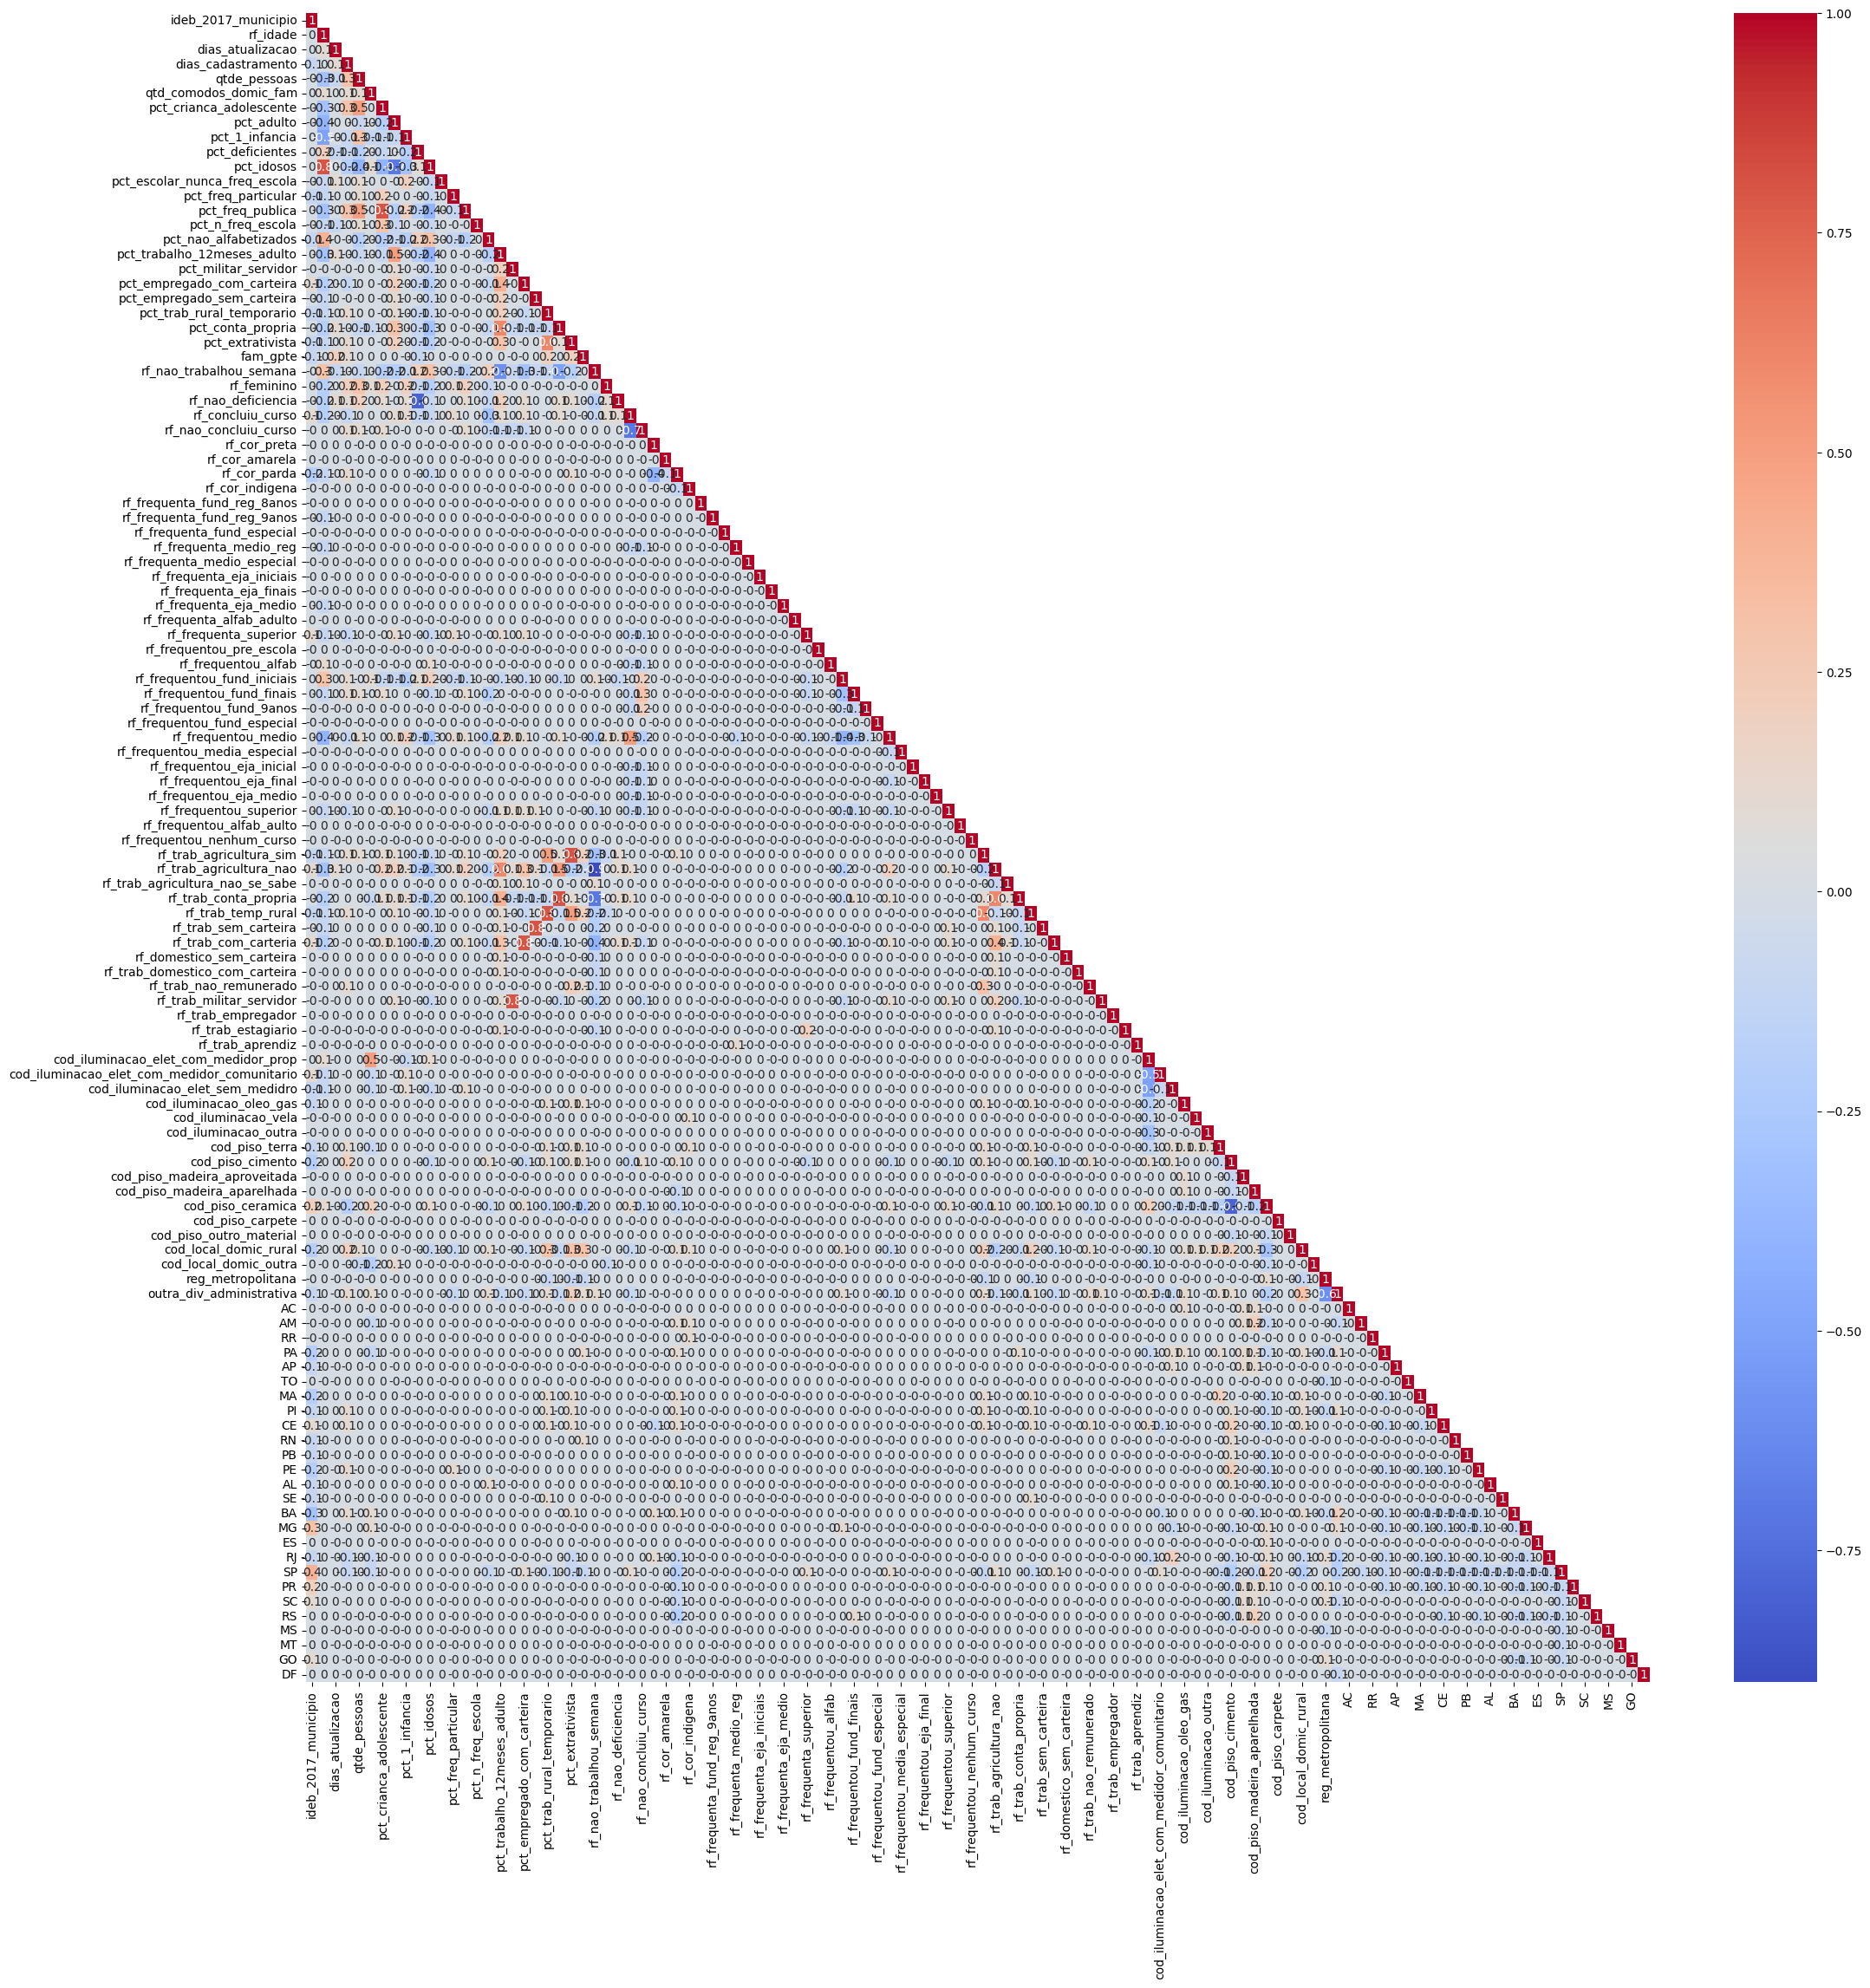

In [27]:
# Cria mask para não mostrar valores acima da diagonal
df_features = df_balanceado[['ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente',
                        'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 
                        'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 'pct_empregado_com_carteira', 
                        'pct_empregado_sem_carteira', 'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 
                        'rf_feminino', 'rf_nao_deficiencia', 'rf_concluiu_curso', 'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena',
                        'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 
                        'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 
                        'rf_frequentou_pre_escola', 'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos',
                        'rf_frequentou_fund_especial', 'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 'rf_frequentou_eja_final',
                        'rf_frequentou_eja_medio', 'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_trab_agricultura_sim',
                        'rf_trab_agricultura_nao', 'rf_trab_agricultura_nao_se_sabe', 'rf_trab_conta_propria', 'rf_trab_temp_rural', 'rf_trab_sem_carteira', 
                        'rf_trab_com_carteria', 'rf_domestico_sem_carteira', 'rf_trab_domestico_com_carteira', 'rf_trab_nao_remunerado', 'rf_trab_militar_servidor',
                        'rf_trab_empregador', 'rf_trab_estagiario', 'rf_trab_aprendiz', 'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario',
                        'cod_iluminacao_elet_sem_medidro', 'cod_iluminacao_oleo_gas', 'cod_iluminacao_vela', 'cod_iluminacao_outra', 'cod_piso_terra', 'cod_piso_cimento',
                        'cod_piso_madeira_aproveitada', 'cod_piso_madeira_aparelhada', 'cod_piso_ceramica', 'cod_piso_carpete', 'cod_piso_outro_material', 'cod_local_domic_rural',
                        'cod_local_domic_outra', 'reg_metropolitana', 'outra_div_administrativa', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE',
                        'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']]

mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)

plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [28]:
# Obter os valores de correlação acima de um certo valor
# exceto valores da diagonal principal
corr_matrix = df_features.corr().abs()
threshold = 0.7
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: rf_idade e pct_idosos, Correlação: 0.76
Colunas: pct_crianca_adolescente e pct_freq_publica, Correlação: 0.80
Colunas: pct_adulto e pct_idosos, Correlação: 0.71
Colunas: pct_deficientes e rf_nao_deficiencia, Correlação: 0.84
Colunas: pct_militar_servidor e rf_trab_militar_servidor, Correlação: 0.80
Colunas: pct_empregado_com_carteira e rf_trab_com_carteria, Correlação: 0.76
Colunas: pct_empregado_sem_carteira e rf_trab_sem_carteira, Correlação: 0.78
Colunas: pct_trab_rural_temporario e rf_trab_temp_rural, Correlação: 0.78
Colunas: pct_conta_propria e rf_trab_conta_propria, Correlação: 0.77
Colunas: pct_extrativista e rf_trab_agricultura_sim, Correlação: 0.78
Colunas: rf_nao_trabalhou_semana e rf_trab_agricultura_nao, Correlação: 0.87
Colunas: cod_piso_cimento e cod_piso_ceramica, Correlação: 0.77


In [29]:
df_balanceado = df_balanceado.drop(columns=['rf_nao_deficiencia', 'rf_trab_agricultura_nao'])

In [35]:
# Verificar se há algum valor nulo no dataframe X
nulos = df_balanceado.isnull().sum()

# Exibir apenas as colunas que têm valores nulos
nulos_com_valores = nulos[nulos > 0]

print("Colunas com valores nulos e suas quantidades:")
print(nulos_com_valores)

Colunas com valores nulos e suas quantidades:
dias_cadastramento    1
dtype: int64


In [36]:
df_balanceado = df_balanceado.dropna()

# Seleção das variáveis independentes (Features)

In [37]:
# Exibir todas as colunas do DataFrame final
print(df_balanceado.columns.tolist())

['id_familia', 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira', 'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_concluiu_curso', 'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_curso_frequenta_3.0', 'rf_frequenta_fund_reg_8anos', 'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais', 'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta

In [38]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_balanceado[[ 'ideb_2017_municipio', 'rf_idade', 'dias_atualizacao', 'dias_cadastramento', 'qtde_pessoas', 'qtd_comodos_domic_fam', 'pct_crianca_adolescente', 
                      'pct_adulto', 'pct_1_infancia', 'pct_deficientes', 'pct_idosos', 'pct_escolar_nunca_freq_escola', 'pct_freq_particular', 'pct_freq_publica', 
                      'pct_n_freq_escola', 'pct_nao_alfabetizados', 'pct_trabalho_12meses_adulto', 'pct_militar_servidor', 'pct_empregado_com_carteira', 'pct_empregado_sem_carteira',
                      'pct_trab_rural_temporario', 'pct_conta_propria', 'pct_extrativista', 'fam_gpte', 'rf_nao_trabalhou_semana', 'rf_feminino', 'rf_concluiu_curso', 
                      'rf_nao_concluiu_curso', 'rf_cor_preta', 'rf_cor_amarela', 'rf_cor_parda', 'rf_cor_indigena', 'rf_curso_frequenta_3.0', 'rf_frequenta_fund_reg_8anos',
                      'rf_frequenta_fund_reg_9anos', 'rf_frequenta_fund_especial', 'rf_frequenta_medio_reg', 'rf_frequenta_medio_especial', 'rf_frequenta_eja_iniciais', 
                      'rf_frequenta_eja_finais', 'rf_frequenta_eja_medio', 'rf_frequenta_alfab_adulto', 'rf_frequenta_superior', 'rf_curso_frequenta_14.0', 'rf_curso_frequentou_1.0',
                      'rf_frequentou_pre_escola', 'rf_frequentou_alfab', 'rf_frequentou_fund_iniciais', 'rf_frequentou_fund_finais', 'rf_frequentou_fund_9anos',
                      'rf_frequentou_fund_especial', 'rf_frequentou_medio', 'rf_frequentou_media_especial', 'rf_frequentou_eja_inicial', 'rf_frequentou_eja_final',
                      'rf_frequentou_eja_medio', 'rf_frequentou_superior', 'rf_frequentou_alfab_aulto', 'rf_frequentou_nenhum_curso', 'rf_trab_agricultura_sim',
                      'rf_trab_agricultura_nao_se_sabe', 'rf_trab_conta_propria', 'rf_trab_temp_rural', 'rf_trab_sem_carteira', 'rf_trab_com_carteria', 'rf_domestico_sem_carteira',
                      'rf_trab_domestico_com_carteira', 'rf_trab_nao_remunerado', 'rf_trab_militar_servidor', 'rf_trab_empregador', 'rf_trab_estagiario', 'rf_trab_aprendiz',
                      'cod_iluminacao_elet_com_medidor_prop', 'cod_iluminacao_elet_com_medidor_comunitario', 'cod_iluminacao_elet_sem_medidro', 'cod_iluminacao_oleo_gas', 
                      'cod_iluminacao_vela', 'cod_iluminacao_outra', 'cod_piso_terra', 'cod_piso_cimento', 'cod_piso_madeira_aproveitada', 'cod_piso_madeira_aparelhada', 
                      'cod_piso_ceramica', 'cod_piso_carpete', 'cod_piso_outro_material', 'cod_local_domic_rural', 'cod_local_domic_outra', 'reg_metropolitana', 
                      'outra_div_administrativa', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP',
                      'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']]
y = df_balanceado['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (96791, 115)


,ideb_2017_municipio,rf_idade,dias_atualizacao,dias_cadastramento,qtde_pessoas,qtd_comodos_domic_fam,pct_crianca_adolescente,pct_adulto,pct_1_infancia,pct_deficientes,pct_idosos,pct_escolar_nunca_freq_escola,pct_freq_particular,pct_freq_publica,pct_n_freq_escola,pct_nao_alfabetizados,pct_trabalho_12meses_adulto,pct_militar_servidor,pct_empregado_com_carteira,pct_empregado_sem_carteira,pct_trab_rural_temporario,pct_conta_propria,pct_extrativista,fam_gpte,rf_nao_trabalhou_semana,rf_feminino,rf_concluiu_curso,rf_nao_concluiu_curso,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_curso_frequenta_3.0,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_curso_frequenta_14.0,rf_curso_frequentou_1.0,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_trab_agricultura_sim,rf_trab_agricultura_nao_se_sabe,rf_trab_conta_propria,rf_trab_temp_rural,rf_trab_sem_carteira,rf_trab_com_carteria,rf_domestico_sem_carteira,rf_trab_domestico_com_carteira,rf_trab_nao_remunerado,rf_trab_militar_servidor,rf_trab_empregador,rf_trab_estagiario,rf_trab_aprendiz,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,cod_piso_terra,cod_piso_cimento,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_local_domic_rural,cod_local_domic_outra,reg_metropolitana,outra_div_administrativa,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
0,0.574257,0.294118,0.331317,0.500306,0.166667,0.142857,0.666667,0.333333,0.000000,0.000,0.0,0.0,0.0,0.666667,0.000,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.554455,0.235294,0.056452,0.268572,0.583333,0.238095,0.375000,0.250000,0.375000,0.375,0.0,0.0,0.0,0.375000,0.125,0.125000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.495050,0.166667,0.390457,0.297921,0.083333,0.238095,0.500000,0.500000,0.000000,0.000,0.0,0.5,0.0,0.000000,0.000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.514851,0.401961,0.180108,0.121522,0.083333,0.285714,0.000000,0.500000,0.500000,0.000,0.0,0.0,0.0,0.000000,0.000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.500000,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classe_renda, dtype: int64

In [41]:
X.describe()

,ideb_2017_municipio,rf_idade,dias_atualizacao,dias_cadastramento,qtde_pessoas,qtd_comodos_domic_fam,pct_crianca_adolescente,pct_adulto,pct_1_infancia,pct_deficientes,pct_idosos,pct_escolar_nunca_freq_escola,pct_freq_particular,pct_freq_publica,pct_n_freq_escola,pct_nao_alfabetizados,pct_trabalho_12meses_adulto,pct_militar_servidor,pct_empregado_com_carteira,pct_empregado_sem_carteira,pct_trab_rural_temporario,pct_conta_propria,pct_extrativista,fam_gpte,rf_nao_trabalhou_semana,rf_feminino,rf_concluiu_curso,rf_nao_concluiu_curso,rf_cor_preta,rf_cor_amarela,rf_cor_parda,rf_cor_indigena,rf_curso_frequenta_3.0,rf_frequenta_fund_reg_8anos,rf_frequenta_fund_reg_9anos,rf_frequenta_fund_especial,rf_frequenta_medio_reg,rf_frequenta_medio_especial,rf_frequenta_eja_iniciais,rf_frequenta_eja_finais,rf_frequenta_eja_medio,rf_frequenta_alfab_adulto,rf_frequenta_superior,rf_curso_frequenta_14.0,rf_curso_frequentou_1.0,rf_frequentou_pre_escola,rf_frequentou_alfab,rf_frequentou_fund_iniciais,rf_frequentou_fund_finais,rf_frequentou_fund_9anos,rf_frequentou_fund_especial,rf_frequentou_medio,rf_frequentou_media_especial,rf_frequentou_eja_inicial,rf_frequentou_eja_final,rf_frequentou_eja_medio,rf_frequentou_superior,rf_frequentou_alfab_aulto,rf_frequentou_nenhum_curso,rf_trab_agricultura_sim,rf_trab_agricultura_nao_se_sabe,rf_trab_conta_propria,rf_trab_temp_rural,rf_trab_sem_carteira,rf_trab_com_carteria,rf_domestico_sem_carteira,rf_trab_domestico_com_carteira,rf_trab_nao_remunerado,rf_trab_militar_servidor,rf_trab_empregador,rf_trab_estagiario,rf_trab_aprendiz,cod_iluminacao_elet_com_medidor_prop,cod_iluminacao_elet_com_medidor_comunitario,cod_iluminacao_elet_sem_medidro,cod_iluminacao_oleo_gas,cod_iluminacao_vela,cod_iluminacao_outra,cod_piso_terra,cod_piso_cimento,cod_piso_madeira_aproveitada,cod_piso_madeira_aparelhada,cod_piso_ceramica,cod_piso_carpete,cod_piso_outro_material,cod_local_domic_rural,cod_local_domic_outra,reg_metropolitana,outra_div_administrativa,AC,AM,RR,PA,AP,TO,MA,PI,CE,RN,PB,PE,AL,SE,BA,MG,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
count,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000,96791.000000
mean,0.644668,0.305648,0.275014,0.335218,0.121919,0.252524,0.152479,0.518294,0.105183,0.097664,0.224044,0.006765,0.013261,0.157848,0.014016,0.132312,0.244202,0.010113,0.059378,0.008916,0.019903,0.120513,0.043124,0.101404,0.657933,0.799744,0.411309,0.407011,0.087859,0.005755,0.590706,0.005042,0.000072,0.000723,0.001942,0.000134,0.006602,0.000289,0.000971,0.002190,0.003068,0.000124,0.013038,0.000041,0.000031,0.000517,0.006767,0.258691,0.21

In [42]:
y.describe()

count    96791.000000
mean         1.007201
std          0.818666
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: classe_renda, dtype: float64

In [43]:
y.value_counts()

classe_renda
2    32786
0    32089
1    31916
Name: count, dtype: int64

In [44]:
y.isnull().sum()

0

In [45]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
y_train.describe()

count    77432.000000
mean         1.007193
std          0.818663
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: classe_renda, dtype: float64

# Estimação padrão

In [48]:
# ESTIMAÇÃO PADRÃO

from matplotlib.pylab import f
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando os modelos
models = {
    'Logistic': LogisticRegression(max_iter=2000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True)
}

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos

Avaliando modelo: Logistic
Scores de validação cruzada: [0.7103377  0.70568864 0.71438719 0.70411985 0.70993155]
Acurácia média: 0.7088929868740194
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6418
           1       0.64      0.55      0.59      6383
           2       0.76      0.78      0.77      6558

    accuracy                           0.71     19359
   macro avg       0.70      0.71      0.70     19359
weighted avg       0.70      0.71      0.70     19359

Acurácia: 0.7078878041221137
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.62904371 0.63039969 0.6327005  0.62824487 0.63102157]
Acurácia média: 0.6302820684049575
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      6418
           1       0.53      0.47      0.50      6383
           2       0.75      